# CSI300 指数的走势和收益率分布

1461


<Axes: xlabel='trade_date'>

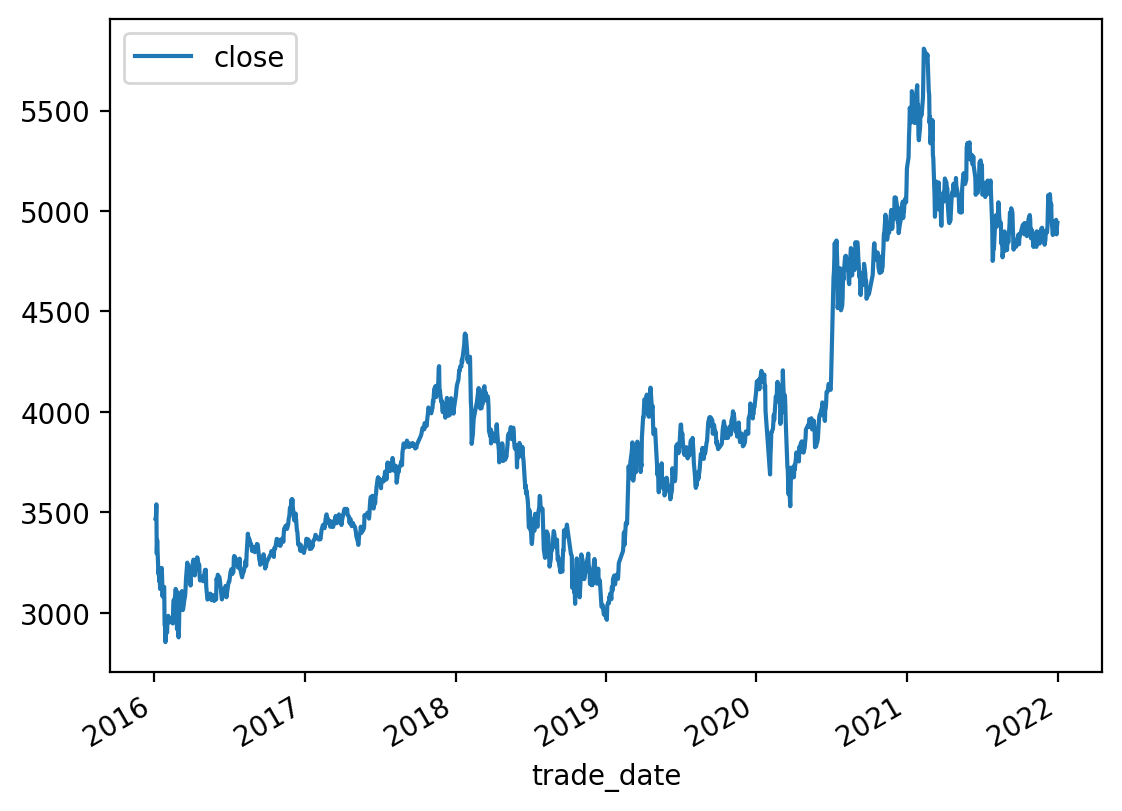

In [36]:
# packages and globals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# inline mat
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.dpi'] = 300
import tushare as ts
ts.set_token('4167d168dd2c182108319b0f5fc93d66b21d5ccf2baa2af2a522b80d')
pro = ts.pro_api()

# quiet 执行不显示warning
import warnings
warnings.filterwarnings('ignore')

start_date = '2016-01-01'
# end_date = '2023-01-01'
end_date = '2022-01-01'
# 沪深300指数
csi300_df = pro.index_daily(ts_code='000300.SH',
                            start_date=start_date,
                            end_date=end_date)
# date to datetime
csi300_df['trade_date'] = pd.to_datetime(csi300_df['trade_date'])
# sort csi300
csi300_df = csi300_df.sort_values(by='trade_date', ascending=True)
print(len(csi300_df))
csi300_df.plot(x='trade_date', y='close')


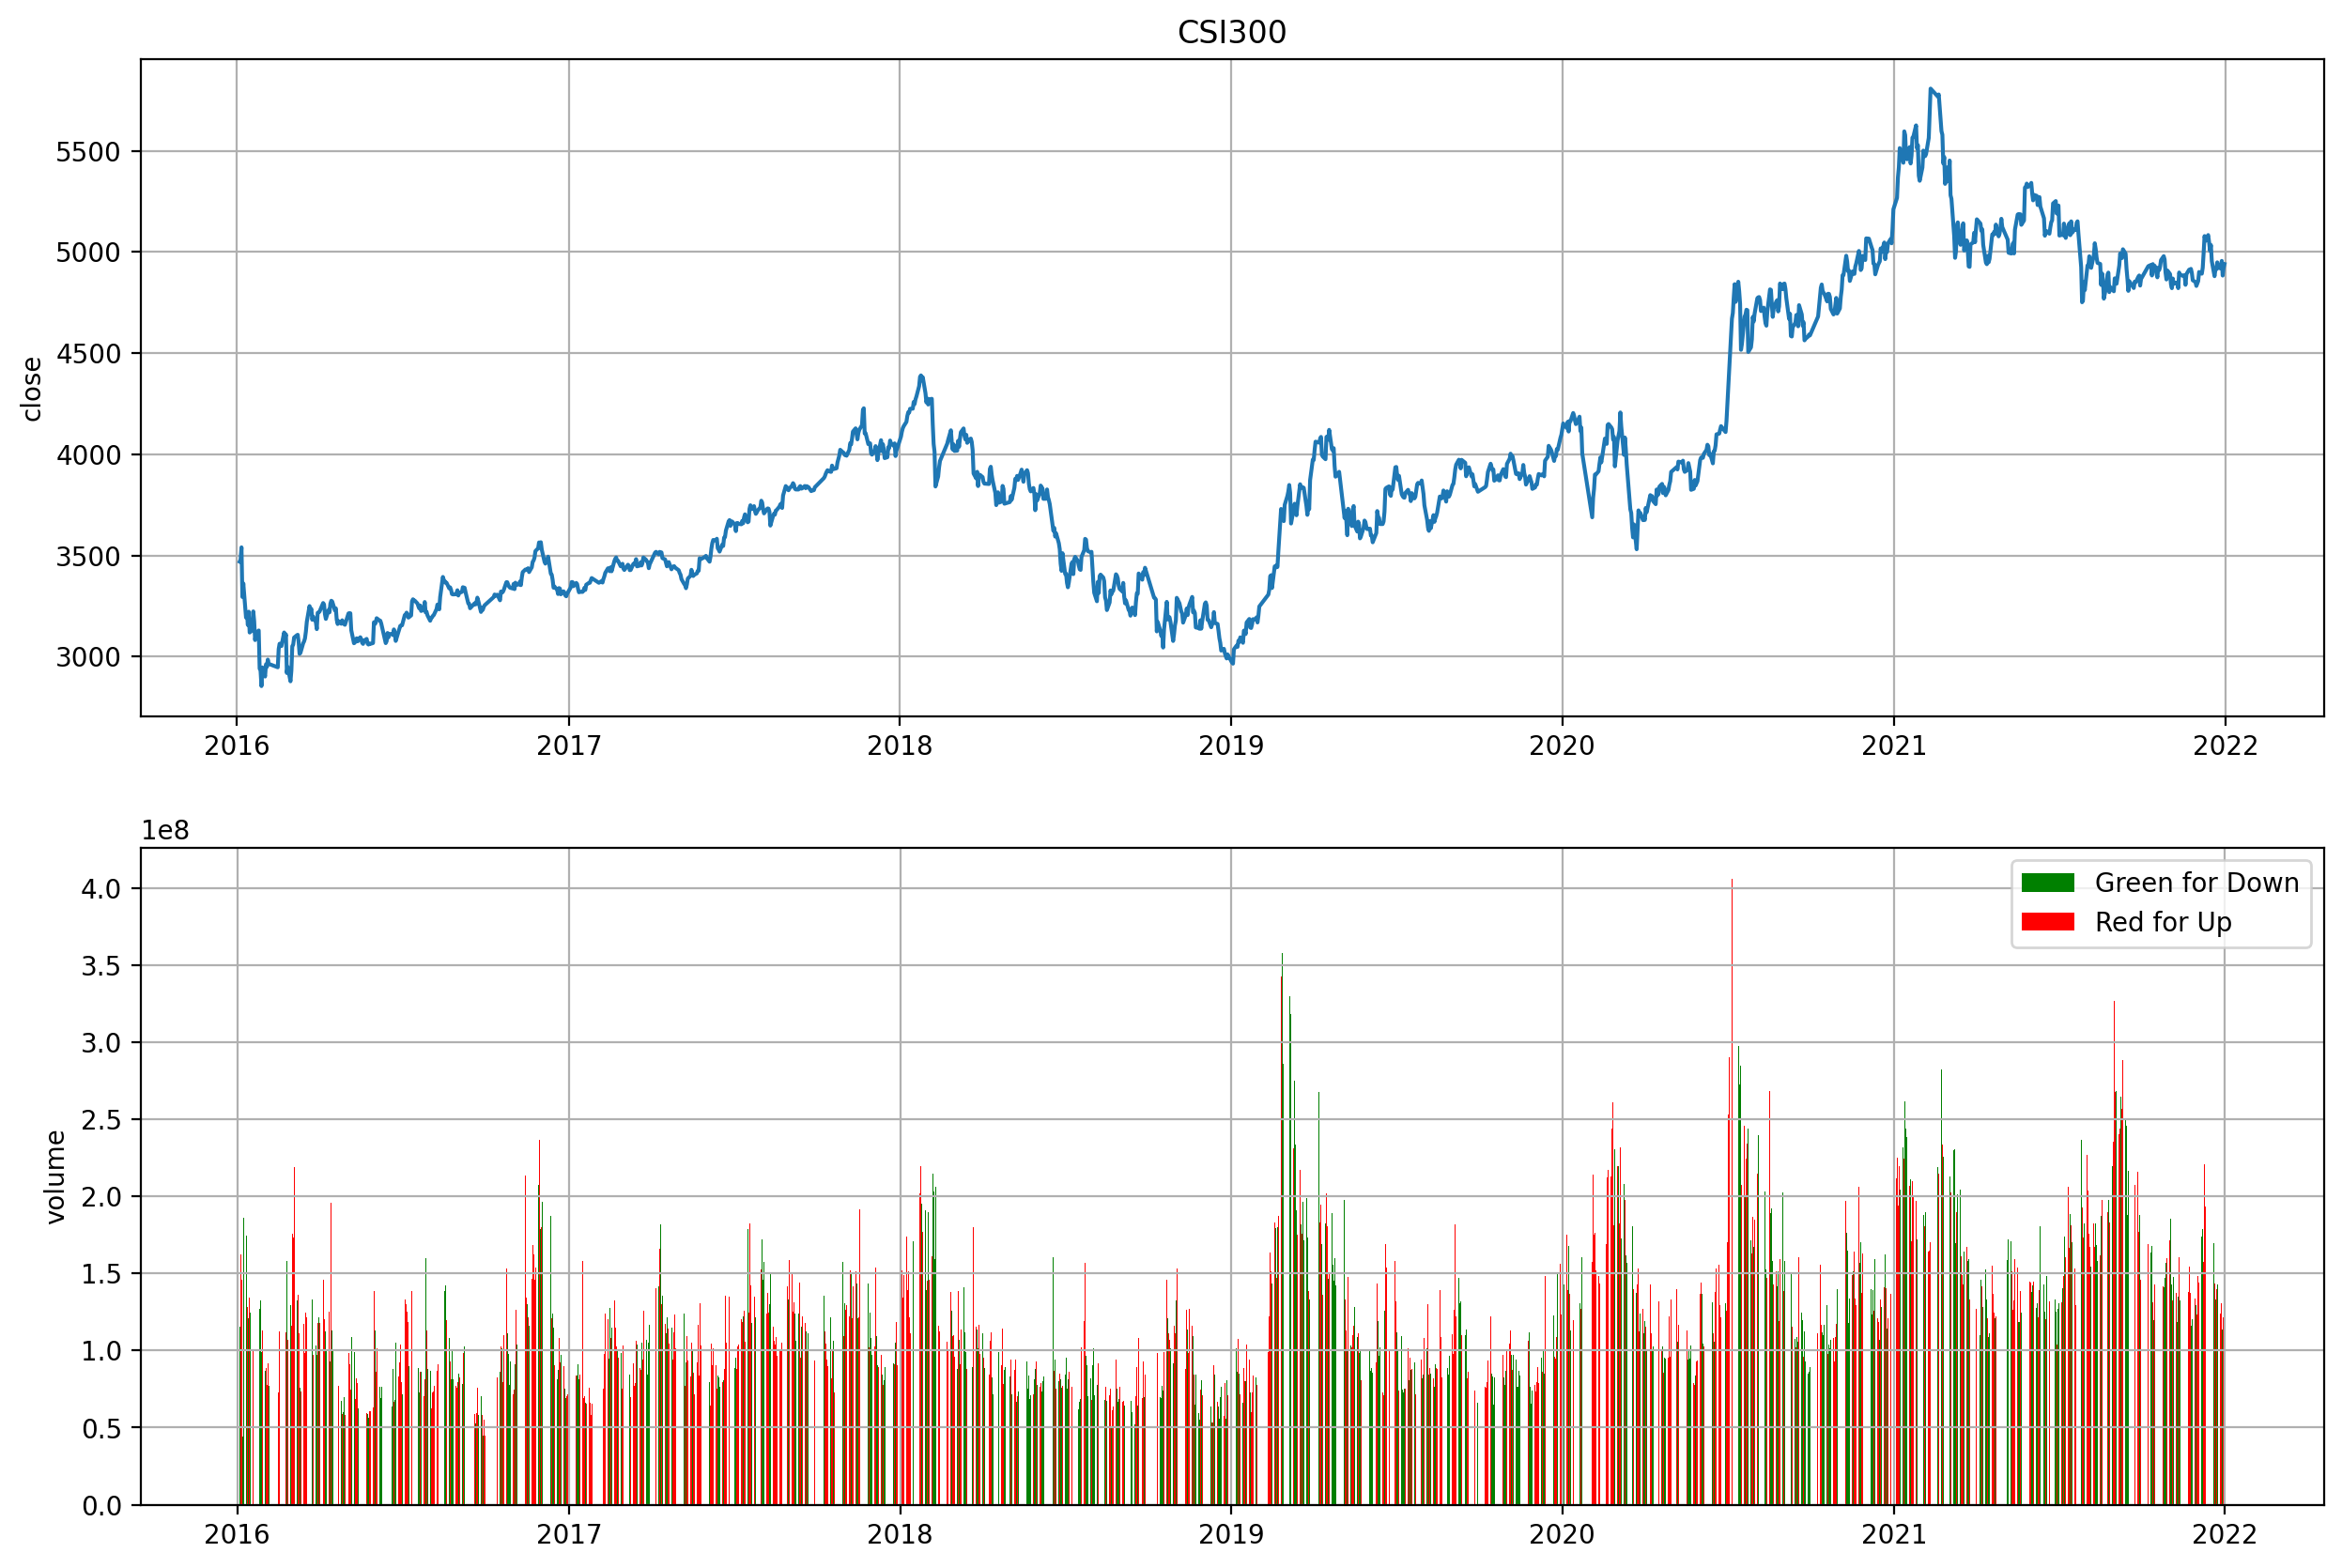

In [12]:
# csi300_df.close 上面画k线图，下面画成交量，两张图拼接
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(csi300_df['trade_date'], csi300_df['close'])
ax[0].set_title('CSI300')
ax[0].set_ylabel('close')
ax[0].grid(True)
# 成交量粗一点，柱子间的颜色不同，红涨绿跌
handle = ax[1].bar(csi300_df['trade_date'], csi300_df['vol'], color=np.where(csi300_df['close'] > csi300_df['open'], 'r', 'g'))
# lengend: red up, green down
ax[1].legend(handle, ['Green for Down', 'Red for Up'])

# ax[1].bar(csi300_df['trade_date'], csi300_df['vol'])
ax[1].set_ylabel('volume')
ax[1].grid(True)
plt.show()

In [ ]:
def plot_k_line(df, title):
    # 画k线图
    # 创建一个画布
    fig = plt.figure(figsize=(16, 8))
    # 将画布分成1行1列，选择第一个区域作子图
    ax = fig.add_subplot(1, 1, 1)
    # 画k线图
    ax.plot(df['trade_date'], df['close'], label='close')
    # 设置标题
    ax.set_title(title)
    # 设置x轴标签
    ax.set_xlabel('date')
    # 设置y轴标签
    ax.set_ylabel('close')
    # 设置网格线
    ax.grid(True)
    # 设置图例
    ax.legend(loc='best')
    # 画成交量
    ax2 = ax.twinx()
    ax2.bar(df['trade_date'], df['vol'], label='vol')
    ax2.set_ylabel('vol')
    ax2.legend(loc='upper center')
    # 保存图片
    # plt.savefig(title + '.png')
    # 显示图片
    plt.show()

plot_k_line(csi300_df, 'csi300')

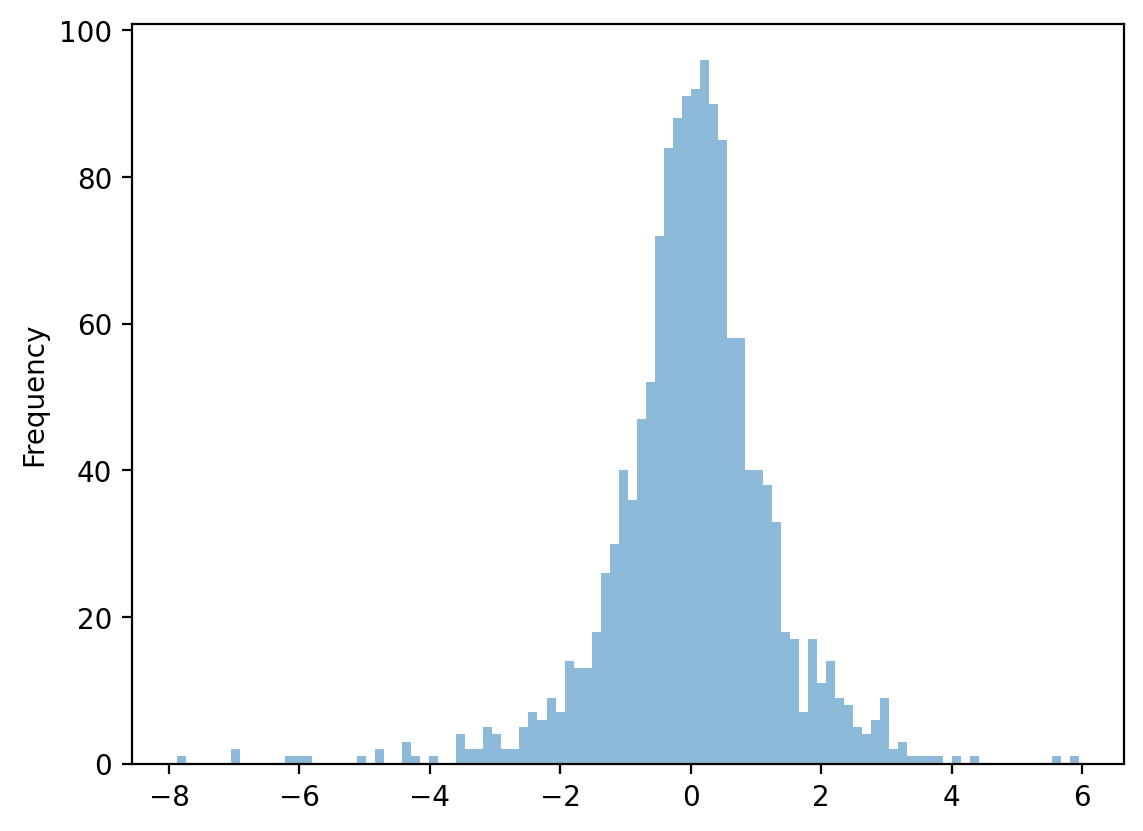

In [3]:
# 画收益率分布，验证尖峰厚尾
csi300_df['pct_chg'].plot.hist(bins=100, alpha=0.5)
plt.show()

mean: 0.026921149897330597
std: 1.2379339507953675


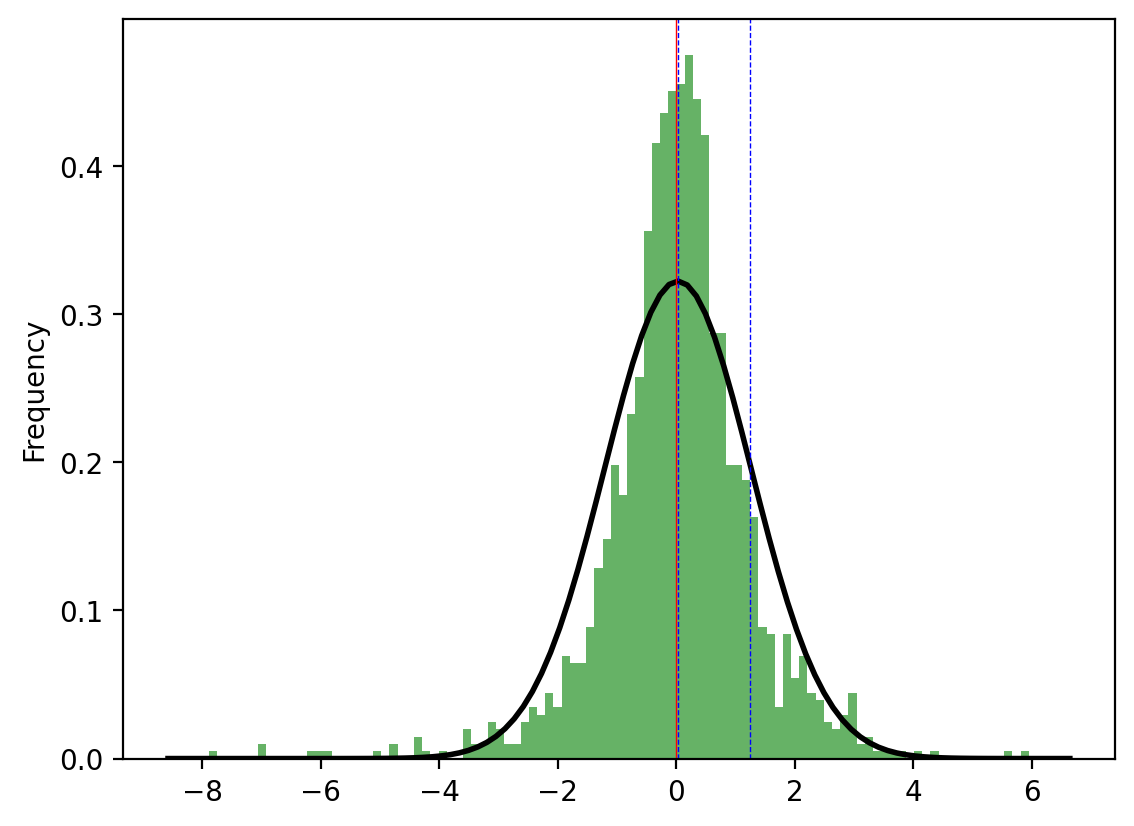

In [13]:
# 画拟合的正态分布
from scipy.stats import norm
# 画收益率分布
csi300_df['pct_chg'].plot.hist(bins=100, density=True, alpha=0.6, color='g')
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, csi300_df['pct_chg'].mean(), csi300_df['pct_chg'].std())
plt.plot(x, p, 'k', linewidth=2)
# 画x=0
plt.axvline(x=0, color='r',linewidth=0.5)
# 画收益率分布平均值
plt.axvline(x=csi300_df['pct_chg'].mean(), color='b', linestyle='--',linewidth=0.5)
print('mean:', csi300_df['pct_chg'].mean())
# 画收益率分布标准差
plt.axvline(x=csi300_df['pct_chg'].std(), color='b', linestyle='--',linewidth=0.5)
print('std:', csi300_df['pct_chg'].std())
plt.show()


mean: 0.026921149897330597
1
mean: [-0.01624628]
std: [[0.67925087]]
weight: 0.6675145110832386
2
mean: [-0.9981108]
std: [[1.96851973]]
weight: 0.15714920288292306
3
mean: [1.10997045]
std: [[1.17594117]]
weight: 0.1753362860338384
skew: -0.6724210264552811
kurt: 4.932061007680614


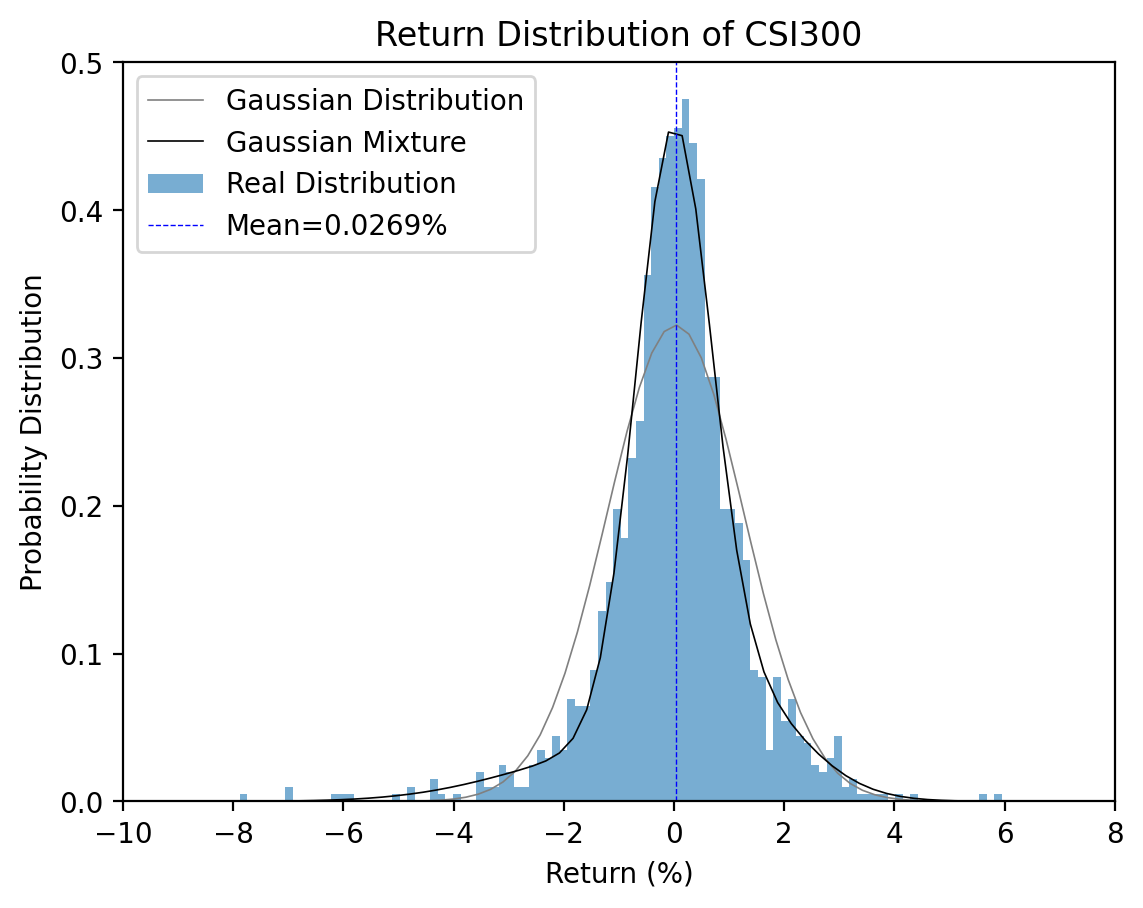

In [44]:
# 正态分布
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, csi300_df['pct_chg'].mean(), csi300_df['pct_chg'].std())
plt.plot(x, p, 'gray', linewidth=0.6,label='Gaussian Distribution')


# 拟合高斯混合分布
from sklearn.mixture import GaussianMixture

n_components = 3

gmm = GaussianMixture(n_components=n_components, covariance_type='full').fit(csi300_df['pct_chg'].values.reshape(-1, 1))
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gmm.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(p), 'k', linewidth=0.6, label='Gaussian Mixture')

# 画图
plt.hist(csi300_df['pct_chg'], bins=100, density=True, alpha=0.6,label='Real Distribution')
# 画低%5分位数
# plt.axvline(x=csi300_df['pct_chg'].quantile(0.05), color='b', linestyle='--',linewidth=0.5)
# print('5% quantile:', csi300_df['pct_chg'].quantile(0.05))

# 画x=0
# plt.axvline(x=0, color='r',linewidth=0.5) 

# 画收益率分布平均值
plt.axvline(x=csi300_df['pct_chg'].mean(), color='b', linestyle='--',linewidth=0.5,label='Mean=0.0269%')
print('mean:', csi300_df['pct_chg'].mean())
# 输出两个混合分布参数
for i in range(n_components):
    print(i+1)
    print('mean:', gmm.means_[i])
    print('std:', np.sqrt(gmm.covariances_[i]))
    print('weight:', gmm.weights_[i])

# 分布参数作为注释, 居中显示
# plt.annotate('1. mean: %.2f, std: %.2f, weight: %.2f \n2. mean: %.2f, std: %.2f, weight: %.2f' % \
#              (gmm.means_[0], np.sqrt(gmm.covariances_[0]), gmm.weights_[0],gmm.means_[1]\
#               , np.sqrt(gmm.covariances_[1]), gmm.weights_[1]), xy=(0.1, 0.85), xycoords='axes fraction')

# 偏态
print('skew:', csi300_df['pct_chg'].skew())
# 峰度
print('kurt:', csi300_df['pct_chg'].kurt())

plt.ylabel('Probability Distribution')
plt.xlabel('Return (%)')
plt.xlim(-10, 8)
plt.ylim(0, 0.5)


# 标题
plt.title('Return Distribution of CSI300')
plt.legend()
plt.show()

mean: 0.026921149897330597
tail mean: -3.094049315068493
VaR: -1.9129


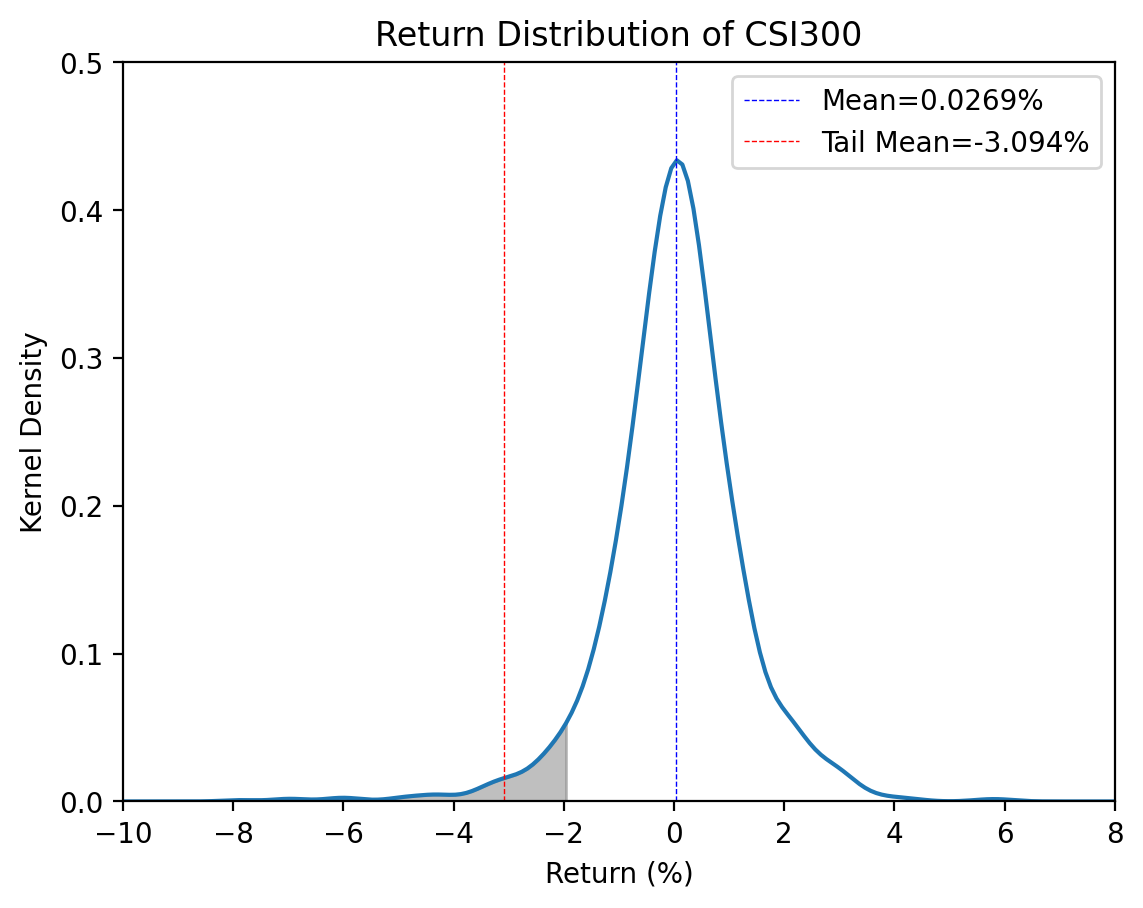

In [52]:
# 画核密度
from scipy.stats import gaussian_kde
density = gaussian_kde(csi300_df['pct_chg'])
xs = np.linspace(-10,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
# 画均值
plt.axvline(x=csi300_df['pct_chg'].mean(), color='b', linestyle='--',linewidth=0.5,label='Mean=0.0269%')
print('mean:', csi300_df['pct_chg'].mean())

# 画5%分位数，核密度小于分位数的曲线下方填充
plt.fill_between(xs, density(xs), where=xs<csi300_df['pct_chg'].quantile(0.05), color='gray', alpha=0.5)
# 尾部均值
print('tail mean:', csi300_df[csi300_df['pct_chg']<csi300_df['pct_chg'].quantile(0.05)]['pct_chg'].mean())
# 画尾部均值
plt.axvline(x=csi300_df[csi300_df['pct_chg']<csi300_df['pct_chg'].quantile(0.05)]['pct_chg'].mean(), color='r', linestyle='--',linewidth=0.5,label='Tail Mean=-3.094%')
# VaR
print('VaR:', csi300_df['pct_chg'].quantile(0.05))
# 画VaR
# plt.axvline(x=csi300_df['pct_chg'].quantile(0.05), color='r', linestyle='--',linewidth=0.5,label='VaR=-1.91%')

# 核密度的英文
plt.ylabel('Kernel Density')
plt.xlabel('Return (%)')
plt.xlim(-10, 8)
plt.ylim(0,0.5)
plt.title('Return Distribution of CSI300')
plt.legend()
plt.show()


In [7]:
# t test 均值为0
from scipy import stats
stats.ttest_1samp(csi300_df['pct_chg'], 0)



TtestResult(statistic=0.8312300600669372, pvalue=0.40597959419099894, df=1460)

mean: 0.026921149897330597
1
mean: [-0.03340115]
std: [[0.68474057]]
weight: 0.663832464877494
2
mean: [1.01075386]
std: [[1.23584815]]
weight: 0.21379280014632354
3
mean: [-1.36464424]
std: [[1.9119068]]
weight: 0.12237473497618247
skew: -0.6724210264552811
kurt: 4.932061007680614


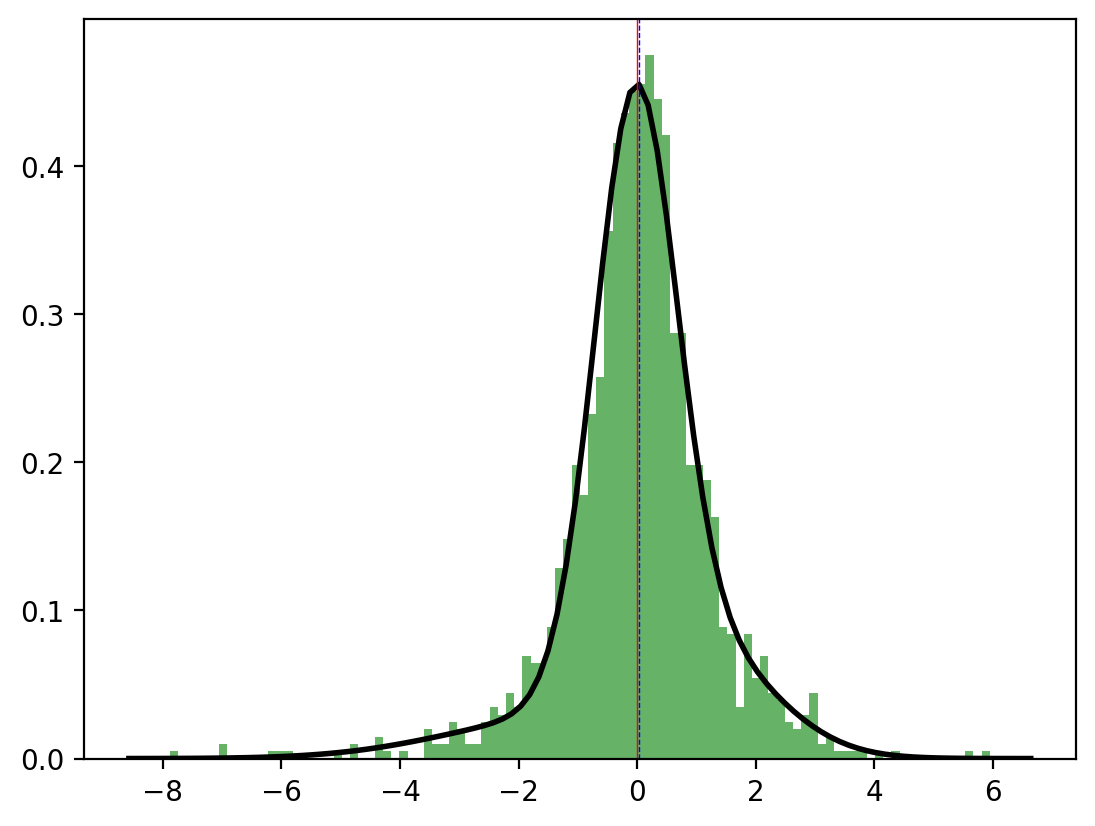

In [39]:
# t 检验收益率均值为0怎么办
# 1. 假设收益率服从正态分布，用正态分布的均值和方差代替
# 2. 假设收益率服从混合高斯分布，用混合高斯分布的均值和方差代替

# 1. 假设收益率服从正态分布，用正态分布的均值和方差代替
# 画图
plt.hist(csi300_df['pct_chg'], bins=100, density=True, alpha=0.6, color='g')
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gmm.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(p), 'k', linewidth=2)

# 画x=0
plt.axvline(x=0, color='r',linewidth=0.5)

# 画收益率分布平均值
plt.axvline(x=csi300_df['pct_chg'].mean(), color='b', linestyle='--',linewidth=0.5)
print('mean:', csi300_df['pct_chg'].mean())
# 输出两个混合分布参数
for i in range(n_components):
    print(i+1)
    print('mean:', gmm.means_[i])
    print('std:', np.sqrt(gmm.covariances_[i]))
    print('weight:', gmm.weights_[i])

# 分布参数作为注释, 居中显示
# plt.annotate('1. mean: %.2f, std: %.2f, weight: %.2f \n2. mean: %.2f, std: %.2f, weight: %.2f' % \
#              (gmm.means_[0], np.sqrt(gmm.covariances_[0]), gmm.weights_[0],gmm.means_[1]\
#               , np.sqrt(gmm.covariances_[1]), gmm.weights_[1]), xy=(0.1, 0.85), xycoords='axes fraction')

# 偏态
print('skew:', csi300_df['pct_chg'].skew())
# 峰度
print('kurt:', csi300_df['pct_chg'].kurt())



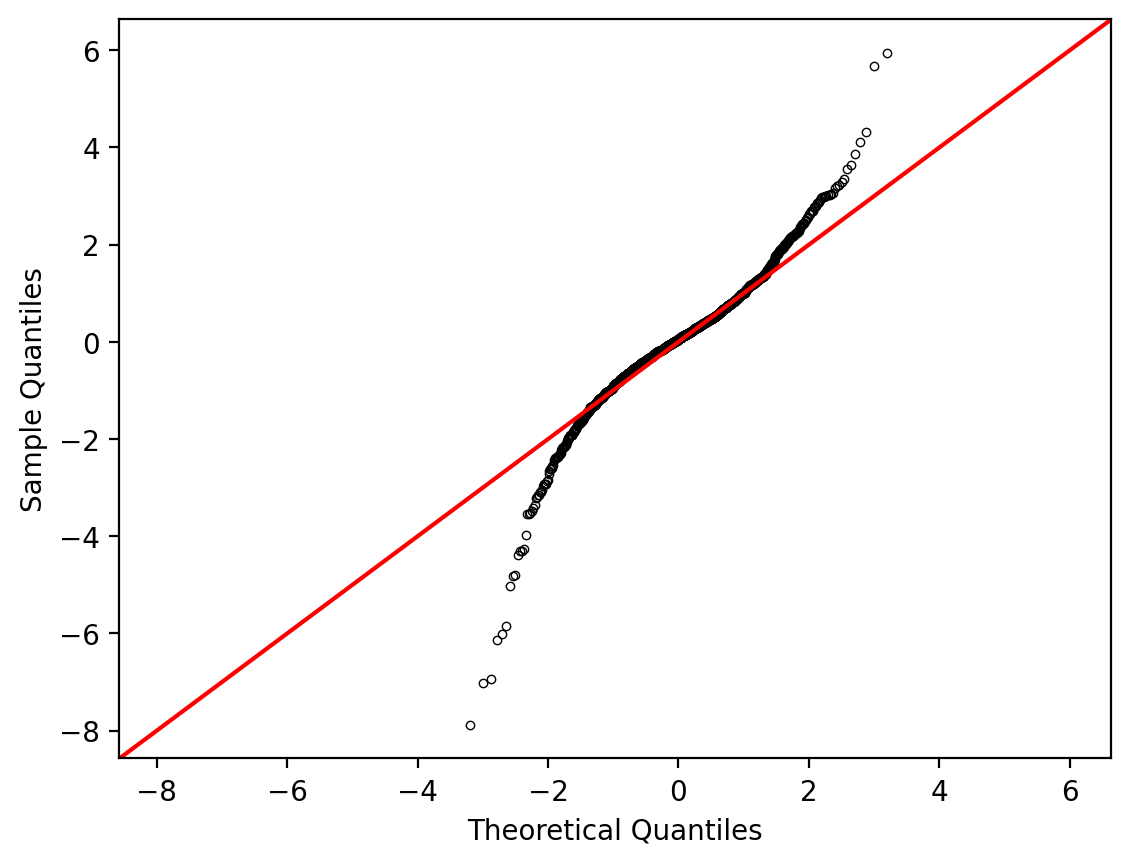

In [19]:
# qq图
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab

# 画qq图，空心圆, 圆圈线细一点
sm.qqplot(csi300_df['pct_chg'], line='45', markerfacecolor='none', markeredgecolor='k', markeredgewidth=0.5, markersize=3)
pylab.show()
